<a href="https://colab.research.google.com/github/pb-roshith/male-female-classification-CNN/blob/main/maleAndFemaleCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [6]:
!mkdir .p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘.p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

 93% 251M/269M [00:01<00:00, 167MB/s]
100% 269M/269M [00:01<00:00, 187MB/s]


In [8]:
from zipfile import ZipFile
dataset='/content/gender-classification-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("extracted successfully dude")

extracted successfully dude


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [13]:
female_data = os.listdir('/content/data/female')
print(female_data[0:5])

['168154.jpg.jpg', '146397.jpg.jpg', '190227.jpg.jpg', '156608.jpg.jpg', '149451.jpg.jpg']


In [ ]:
male_data = os.listdir('/content/data/male')
print(male_data[0:5])

In [15]:
female_data = female_data[:3500]
male_data = male_data[:3500]

In [16]:
print('Number of with female images : ', len(female_data))
print('Number of without male images : ', len(male_data))

Number of with female images :  3500
Number of without male images :  3500


In [17]:
female_data_label = [1]*3500
male_data_label = [0]*3500

In [18]:
print(female_data_label[0:5])
print(male_data_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [19]:
labels = female_data_label + male_data_label
print(len(labels))

7000


In [21]:
data=[]

female_data_path = '/content/data/female/'

for im in female_data:
  i=Image.open(female_data_path + im)
  i=i.resize((128, 128))
  i=i.convert('RGB')
  i=np.array(i)
  data.append(i)

male_data_path = '/content/data/male/'

for im in male_data:
  i=Image.open(male_data_path + im)
  i=i.resize((128, 128))
  i=i.convert('RGB')
  i=np.array(i)
  data.append(i)

In [22]:
type(data)

list

In [23]:
len(data)

7000

In [24]:
x=np.array(data)
y=np.array(labels)

In [25]:
type(x)
type(y)

numpy.ndarray

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [27]:
x_train_scale = x_train/255
x_test_scale = x_test/255

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
num = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num, activation='sigmoid'))

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [32]:
history = model.fit(x_train_scale, y_train, validation_split=0.1, epochs=15)

Epoch 1/15
158/158 [==============================] - 145s 920ms/step - loss: 0.3612 - acc: 0.8492 - val_loss: 0.3535 - val_acc: 0.8375
Epoch 2/15
158/158 [==============================] - 146s 920ms/step - loss: 0.2894 - acc: 0.8865 - val_loss: 0.3309 - val_acc: 0.8821
Epoch 3/15
158/158 [==============================] - 151s 954ms/step - loss: 0.2368 - acc: 0.9091 - val_loss: 0.3118 - val_acc: 0.8821
Epoch 4/15
158/158 [==============================] - 142s 897ms/step - loss: 0.1911 - acc: 0.9278 - val_loss: 0.3448 - val_acc: 0.8643
Epoch 5/15
158/158 [==============================] - 141s 895ms/step - loss: 0.1677 - acc: 0.9397 - val_loss: 0.2955 - val_acc: 0.9036
Epoch 6/15
158/158 [==============================] - 141s 894ms/step - loss: 0.1311 - acc: 0.9496 - val_loss: 0.3413 - val_acc: 0.8982
Epoch 7/15
158/158 [==============================] - 139s 879ms/step - loss: 0.1201 - acc: 0.9556 - val_loss: 0.3462 - val_acc: 0.8964
Epoch 8/15
158/158 [============================

In [33]:
loss, accuracy = model.evaluate(x_test_scale, y_test)
print("Test Accuracy :", accuracy)

44/44 [==============================] - 10s 231ms/step - loss: 0.3419 - acc: 0.9171
Test Accuracy : 0.9171428680419922


In [41]:
def classify(im):
  input_image = cv2.imread(input_image_path)
  cv2_imshow(input_image)
  input_image_resize=cv2.resize(input_image, (128, 128))
  input_image_scale = input_image_resize/255
  input_image_reshape = np.reshape(input_image_scale, [1, 128, 128, 3])
  input_predict = model.predict(input_image_reshape)
  input_pred_label = np.argmax(input_predict)
  print(input_pred_label)
  if input_pred_label==1:
    print('the given image is female')
  else:
    print('the given image is male')

Path of the image to be predicted : /content/pri4.jpg


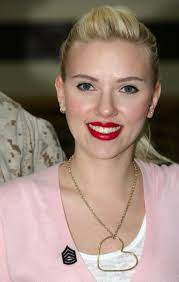

1/1 [==============================] - 0s 76ms/step
1
the given image is female


In [42]:
input_image_path = input('Path of the image to be predicted : ')
classify(input_image_path)

Path of the image to be predicted : /content/r.jpeg


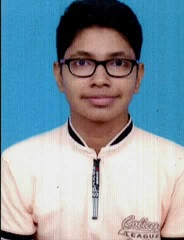

1/1 [==============================] - 0s 46ms/step
0
the given image is male


In [43]:
input_image_path = input('Path of the image to be predicted : ')
classify(input_image_path)